# 分位数法

原始数据:
            值
0   54.967142
1   48.617357
2   56.476885
3   65.230299
4   47.658466
5   47.658630
6   65.792128
7   57.674347
8   45.305256
9   55.425600
10  45.365823
11  45.342702
12  52.419623
13  30.867198
14  32.750822
15  44.377125
16  39.871689
17  90.000000
18   5.000000
19  95.000000


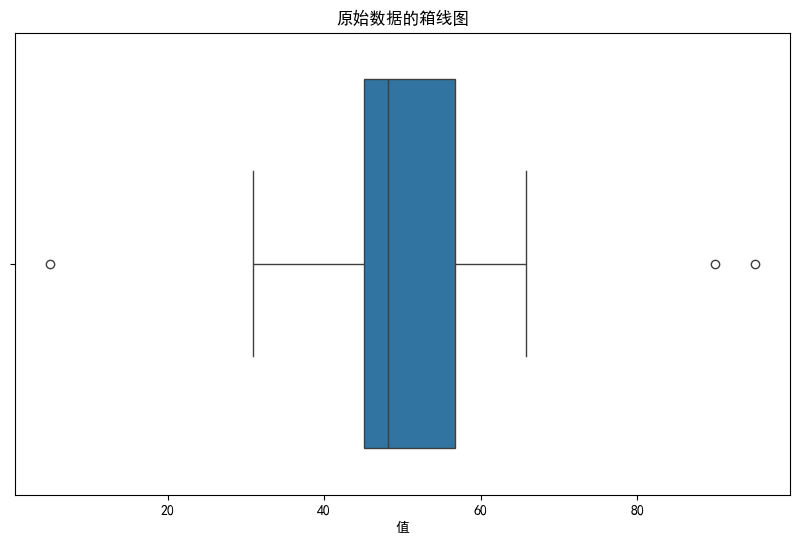


分位数统计:
Q1 (25%分位数): 45.07
Q3 (75%分位数): 56.78
IQR (四分位距): 11.70
下界: Q1 - 1.5*IQR = 27.52
上界: Q3 + 1.5*IQR = 74.33

检测到的异常值:
       值
17  90.0
18   5.0
19  95.0

方法1 - 删除异常值后的数据:
            值
0   54.967142
1   48.617357
2   56.476885
3   65.230299
4   47.658466
5   47.658630
6   65.792128
7   57.674347
8   45.305256
9   55.425600
10  45.365823
11  45.342702
12  52.419623
13  30.867198
14  32.750822
15  44.377125
16  39.871689


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子以确保结果可重现
np.random.seed(42)

# 生成20个随机样本，其中包含一些异常值
data = np.random.normal(loc=50, scale=10, size=17)
# 添加3个异常值
outliers = np.array([90, 5, 95])
all_data = np.concatenate([data, outliers])

# 创建DataFrame以便于分析
df = pd.DataFrame({'值': all_data})

# 显示原始数据
print("原始数据:")
print(df)
# 设置matplotlib显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号

# 绘制原始数据的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['值'])
plt.title('原始数据的箱线图')
plt.show()

# 计算分位数
Q1 = df['值'].quantile(0.25)
Q3 = df['值'].quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n分位数统计:")
print(f"Q1 (25%分位数): {Q1:.2f}")
print(f"Q3 (75%分位数): {Q3:.2f}")
print(f"IQR (四分位距): {IQR:.2f}")
print(f"下界: Q1 - 1.5*IQR = {lower_bound:.2f}")
print(f"上界: Q3 + 1.5*IQR = {upper_bound:.2f}")

# 识别异常值
outliers = df[(df['值'] < lower_bound) | (df['值'] > upper_bound)]
print(f"\n检测到的异常值:")
print(outliers)

# 处理异常值 - 方法1：删除
df_removed = df[(df['值'] >= lower_bound) & (df['值'] <= upper_bound)]
print(f"\n方法1 - 删除异常值后的数据:")
print(df_removed)




# Z-score 经过标准化后的绝对值大于了某个阈值，就是异常值

# DBSCAN 密度聚类

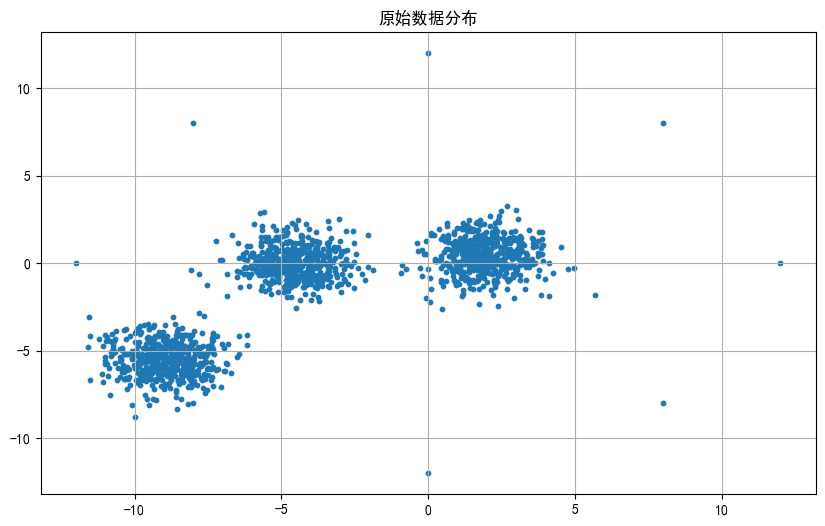

DBSCAN检测到的异常值数量: 58
异常值占比: 3.85%


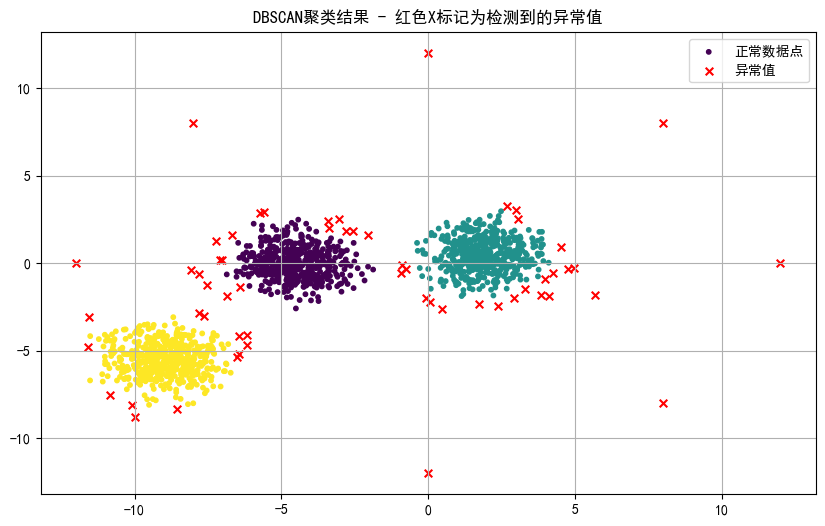


移除异常值后的数据形状: (1450, 2)
原始数据形状: (1508, 2)


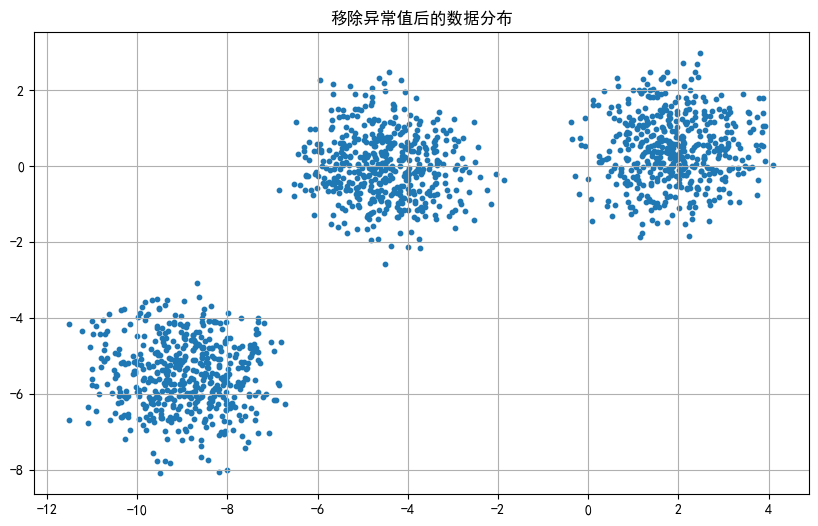

In [5]:
# 使用DBSCAN密度聚类进行异常值检测
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 生成随机数据
n_samples = 1500
random_state = 170
X, _ = make_blobs(n_samples=n_samples, random_state=random_state)

# 添加一些离群点
X = np.vstack([X, np.array([[8, 8], [-8, -8], [8, -8], [-8, 8], [12, 0], [-12, 0], [0, 12], [0, -12]])])

# 将数据转换为DataFrame以便于处理
df_dbscan = pd.DataFrame(X, columns=['x', 'y'])

# 绘制原始数据
plt.figure(figsize=(10, 6))
plt.scatter(df_dbscan['x'], df_dbscan['y'], s=10)
plt.title('原始数据分布')
plt.grid(True)
plt.show()

# 使用DBSCAN进行聚类
# eps: 邻域半径，min_samples: 成为核心点所需的最小样本数
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# -1表示异常点（噪声点）
outliers_mask = clusters == -1
inliers_mask = clusters != -1

# 统计异常值数量
outliers_count = np.sum(outliers_mask)
print(f"DBSCAN检测到的异常值数量: {outliers_count}")
print(f"异常值占比: {outliers_count / len(X):.2%}")

# 绘制聚类结果，突出显示异常值
plt.figure(figsize=(10, 6))
plt.scatter(X[inliers_mask, 0], X[inliers_mask, 1], c=clusters[inliers_mask], cmap='viridis', s=10, label='正常数据点')
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', s=30, marker='x', label='异常值')
plt.title('DBSCAN聚类结果 - 红色X标记为检测到的异常值')
plt.legend()
plt.grid(True)
plt.show()

# 移除异常值后的数据
df_dbscan_cleaned = df_dbscan[~outliers_mask].copy()
print(f"\n移除异常值后的数据形状: {df_dbscan_cleaned.shape}")
print(f"原始数据形状: {df_dbscan.shape}")

# 绘制移除异常值后的数据
plt.figure(figsize=(10, 6))
plt.scatter(df_dbscan_cleaned['x'], df_dbscan_cleaned['y'], s=10)
plt.title('移除异常值后的数据分布')
plt.grid(True)
plt.show()


# 孤立森林

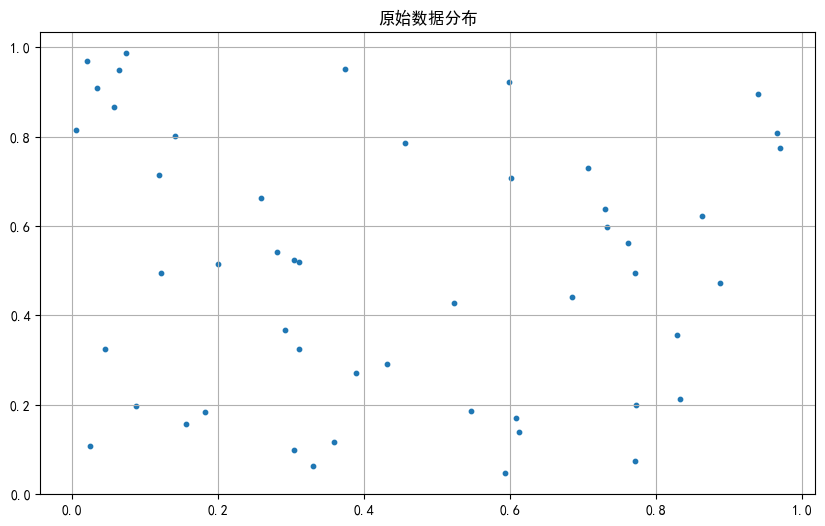

孤立森林检测到的异常值数量: 5
异常值占比: 10.00%


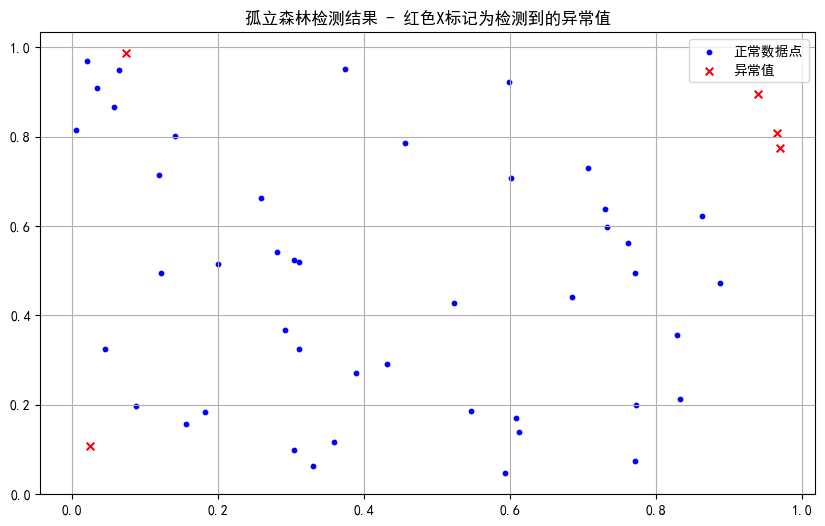


移除异常值后的数据形状: (45, 2)
原始数据形状: (50, 2)


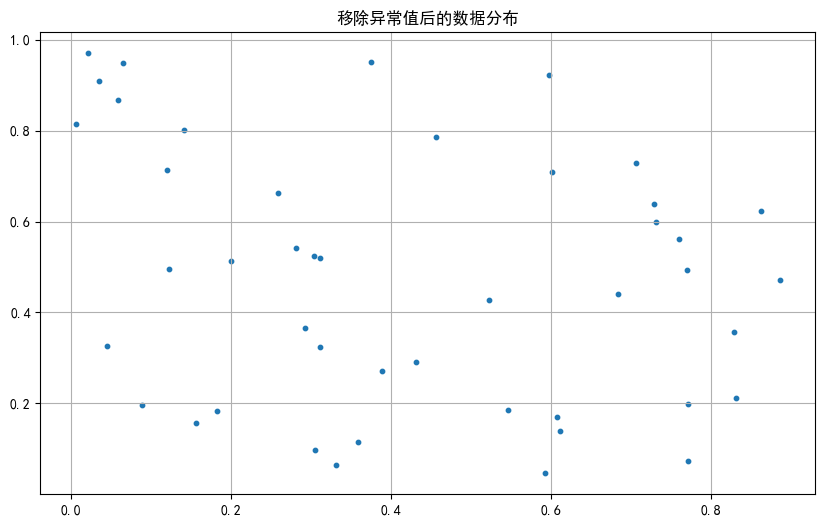

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

# 随机生成50个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 2)  # 2维数据,2列好画图来解释

# 创建DataFrame方便后续处理
df_iforest = pd.DataFrame(X, columns=['x', 'y'])

# 绘制原始数据分布
plt.figure(figsize=(10, 6))
plt.scatter(df_iforest['x'], df_iforest['y'], s=10)
plt.title('原始数据分布')
plt.grid(True)
plt.show()

# 使用孤立森林检测异常值
# contamination: 预期的异常值比例
# random_state: 随机种子，确保结果可重复
# n_estimators: 树的数量
iforest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
# fit_predict返回1表示正常，-1表示异常
predictions = iforest.fit_predict(X)

# 创建异常值和正常值的掩码，是-1表示异常，1表示正常
outliers_mask = predictions == -1
inliers_mask = predictions == 1

# 统计异常值数量
outliers_count = np.sum(outliers_mask)
print(f"孤立森林检测到的异常值数量: {outliers_count}")
print(f"异常值占比: {outliers_count / len(X):.2%}")

# 绘制检测结果，突出显示异常值
plt.figure(figsize=(10, 6))
plt.scatter(X[inliers_mask, 0], X[inliers_mask, 1], c='blue', s=10, label='正常数据点')
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', s=30, marker='x', label='异常值')
plt.title('孤立森林检测结果 - 红色X标记为检测到的异常值')
plt.legend()
plt.grid(True)
plt.show()

# 移除异常值后的数据
df_iforest_cleaned = df_iforest[inliers_mask].copy()
print(f"\n移除异常值后的数据形状: {df_iforest_cleaned.shape}")
print(f"原始数据形状: {df_iforest.shape}")

# 绘制移除异常值后的数据
plt.figure(figsize=(10, 6))
plt.scatter(df_iforest_cleaned['x'], df_iforest_cleaned['y'], s=10)
plt.title('移除异常值后的数据分布')
plt.grid(True)
plt.show()
